作业： 实现线性回归的代码，发布到各人Github

选作：
1. 收敛条件的判断
2. 学习率的选择
3. 类的形式

# Homework 3 Linear Regression Implementation

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('height_train.csv')
data['constant'] = 1
x_train = data.loc[:,['father_height','mother_height','boy_dummy','constant']].values
y_train = data.child_height.values

1. coef from sklearn linear regression

In [35]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression(fit_intercept=False)
clf.fit(x_train, y_train)

print("beta = ", clf.coef_)

beta =  [0.23959427 0.25013358 0.10030806 0.82742996]


2. coef from self-implemented linear regression

In [61]:
X=x_train
y=y_train
n_features = X.shape[1]
beta = np.array( [0.23959427, 0.25013358, 0.10030806, 0.82742996])
epsilon = y - np.dot(X, beta)
gradient = np.mean(epsilon.reshape((-1, 1)) * X, axis=0)

In [22]:
def my_linear_regression(X,y,alpha,n_rounds):
    n_features = X.shape[1]
    beta = np.array([0.0]*n_features)
    loss = []
    for i in range(n_rounds):
        
        #计算 epsilon
        epsilon = y
        for j in range(n_features):
            epsilon = epsilon - beta[j]*X[:,j]
            
        #更新 beta
        for j in range(n_features):
            gradient = -np.mean(epsilon*X[:,j])
            beta[j] = beta[j] - alpha*gradient
    
        loss.append(np.sum(epsilon**2))
        
    return beta, loss

In [63]:
def my_linear_regression_vectorized(X,y,alpha,n_rounds):
    n_features = X.shape[1]
    beta = np.array([0.0]*n_features)
    loss = []
    for i in range(n_rounds):
        
        #compute epsilon
        epsilon = y - np.dot(X, beta)
            
        #update beta
        gradient = - np.mean(epsilon.reshape((-1, 1)) * X, axis=0)
        beta -= alpha*gradient
        
        loss.append(np.sum(epsilon**2))
        
    return beta, loss

In [70]:
beta, loss = my_linear_regression_vectorized(X=x_train, y=y_train, alpha=0.05, n_rounds=200000)

In [71]:
print("beta = ", beta)
print("difference = ", np.abs(beta - clf.coef_))

beta =  [0.24430816 0.25516192 0.10030543 0.81107535]
difference =  [4.71389072e-03 5.02834366e-03 2.63445797e-06 1.63546186e-02]


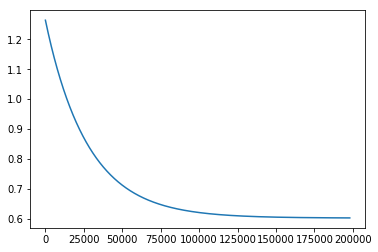

In [72]:
plt.plot(loss[2000:])